In [1]:
%matplotlib inline

#packages for importing scholar data
# google scholar
from scholarly import scholarly
#scopus
from pybliometrics.scopus import AuthorRetrieval

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load author data from google scholar
search_query = scholarly.search_author('Kyle Murphy')
author = next(search_query).fill(sections=['basics','indices','counts'])

citations = np.array(list(author.cites_per_year.values()), dtype=float)
year      = np.array(list(author.cites_per_year.keys()), dtype=float)

since_year = int(year.max()-5)

In [4]:
# attempt to load author data
# from scopus, otherwise use hard
# coded arrays

try:
    au = AuthorRetrieval(25723507400)
except:
    print("Can't run pybliometrics")
    pub_yr = np.array([2008.,2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019., 2020.])
    pub_nm = np.array([2,7,2,5,6,3,8,6,4,10,9,4,3])  
    totpub   = pub_nm.sum()
    totpub5y = pub_nm[np.where(pub_yr >= since_year)].sum()    



Can't run pybliometrics


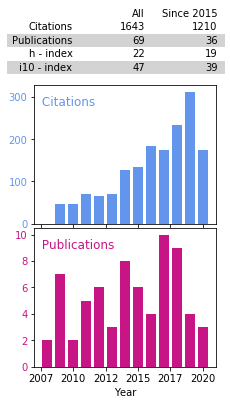

In [130]:
plt.style.use('seaborn-pastel')

# setup a simple figure
fig = plt.figure(figsize=(3.25,6.5))
# setup a grid layout
gs  = fig.add_gridspec(nrows=5, ncols=1, hspace=0.06, wspace=0.0)


c1 = 'cornflowerblue'
c2 = 'mediumvioletred'
wd = 0.8
xlim = [min([year.min(),pub_yr.min()])-1,max([year.max(),pub_yr.max()])+1]

#plot citations
f_ax1 = fig.add_subplot(gs[1:3,0])
f_ax1.bar(year,citations,color=c1,width=wd)
#f_ax1.set_ylabel('Citations', color=c1, size=12)
f_ax1.tick_params(axis='y', labelcolor=c1)
f_ax1.set_xlim(xlim)
f_ax1.xaxis.set_major_formatter(plt.NullFormatter())

# add labels to figure to save space
xlim = f_ax1.get_xlim()
xpos = (xlim[1]-xlim[0])*0.02 + xlim[0]

ylim = f_ax1.get_ylim()
ypos = (ylim[1]-ylim[0])*0.85 + ylim[0]
f_ax1.text(xpos,ypos,' Citations', color=c1, size=12)

#plot publications
f_ax2 = fig.add_subplot(gs[3:,0])
f_ax2.bar(pub_yr,pub_nm, width=wd,color=c2)
f_ax2.set_xlabel('Year')
#f_ax2.set_ylabel('Publications', color=c2, size=12)
f_ax2.tick_params(axis='y', labelcolor=c2)
f_ax2.set_xlim(xlim)
f_ax2.xaxis.set_major_formatter(plt.FormatStrFormatter('%4i'))

# add labels to figure to save space
xlim = f_ax2.get_xlim()
xpos = (xlim[1]-xlim[0])*0.02 + xlim[0]

ylim = f_ax2.get_ylim()
ypos = (ylim[1]-ylim[0])*0.85 + ylim[0]
f_ax2.text(xpos,ypos,' Publications', color=c2, size=12)


#create plot and text for scholar output plot
f_ax3 = fig.add_subplot(gs[0,0])
f_ax3.axis('off')
f_ax3.axis([0,1,0,1])

col_labels = ['All','Since {0:4}'.format(since_year)]
row_labels = ['Citations', 'Publications', 'h - index', 'i10 - index']

tab_data = [[author.citedby, author.citedby5y],
            [totpub, totpub5y],
            [author.hindex, author.hindex5y],
            [author.i10index, author.i10index5y]]

c1 = 'white'
c2 = 'lightgrey'

c_col = [[c1,c1],[c2,c2],[c1,c1],[c2,c2]]

scholar_tab = f_ax3.table(cellText=tab_data,colLabels=col_labels, rowLabels=row_labels, 
                        loc='center left', rowLoc='right', colLoc='right',
                        cellColours=c_col, rowColours=[c1,c2,c1,c2], bbox=[0.25,0.1,0.8,1.0])

# get the table properties and cells
# and loop through each cell to remove
# the boarder
table_props = scholar_tab.properties()
table_cells = table_props['child_artists']
for cell in table_cells: 
    cell.set_edgecolor(None)

# show the plot with the updated table
plt.show()


In [131]:
# save figure and get rid of white space
fig.savefig('ScholarFig',bbox_inches = 'tight',
    pad_inches = 0)